In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [2]:
#read files
envdf = pd.read_csv('World_countries_env_vars.csv')
hdidf = pd.read_csv('HDI.csv')
happinessdf = pd.read_csv('2017.csv')

In [3]:
#clean up data. Many countries have different names across datasets
hdidf_index = hdidf.set_index('Country')
clean_hdidf = hdidf_index.rename(index = {"Bolivia (Plurinational State of)": "Bolivia",
                                        "Brunei Darussalam": "Brunei",
                                        "Guinea-Bissau":"Guinea Bissau",
                                        "Hong Kong, China (SAR)":"Hong Kong",
                                        "Iran (Islamic Republic of)":"Iran",
                                        "Lao People's Democratic Republic":"Laos",
                                        "Moldova (Republic of)":"Moldova",
                                        "Russian Federation":"Russia",
                                        "Syrian Arab Republic":"Syria",
                                        "Venezuela (Bolivarian Republic of)":"Venezuela",
                                        "Viet Nam":"Vietnam"
                                         }) 
envdf_index = envdf.set_index('Country')
clean_envdf = envdf_index.rename(index = {"United States of America": "United States",
                                        "Hong Kong S.A.R.": "Hong Kong",})
                                          
happinessdf_index = happinessdf.set_index('Country')
clean_happinessdf = happinessdf_index.rename(index = {"Hong Kong S.A.R., China": "Hong Kong", }) 

In [4]:
#merge all 3 datasets using inner join
combineddf = clean_envdf.merge(clean_hdidf,  how = 'inner' , on='Country')
combineddf1 = combineddf.merge(clean_happinessdf, how = 'inner' , on='Country')

In [5]:
#create bins based on per capita. Bins are created using exponents instead of linear
percapitabins = [0]
powers_5 = [1000*5**n for n in range(0,5)]
percapitabins .extend(powers_5)
percapitalabels = [f'0 upto 1000']
for n in range(1,5):
   percapitalabels.append(f'{1000*5**(n-1)} till {1000*5**(n)}')
print(percapitabins ,percapitalabels)
combineddf1["binnedpercapita"] = pd.cut(combineddf1['Gross national income (GNI) per capita'], bins=percapitabins , labels=percapitalabels)
#combineddf1.to_excel('converted.xls')

[0, 1000, 5000, 25000, 125000, 625000] ['0 upto 1000', '1000 till 5000', '5000 till 25000', '25000 till 125000', '125000 till 625000']


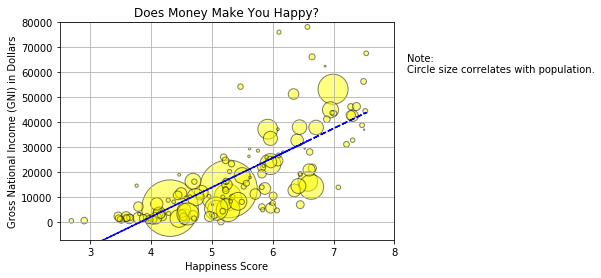

In [6]:
happy = combineddf1["Happiness.Score"]
gni = combineddf1["Gross national income (GNI) per capita"]
population = combineddf1["Total Population (millions) 2015"]

plt.scatter(happy, gni, marker="o", facecolors="yellow", edgecolors="black", s=(population**0.9)*5, alpha=0.5)

plt.grid()
plt.title("Does Money Make You Happy?")
plt.xlabel("Happiness Score")
plt.ylabel("Gross National Income (GNI) in Dollars")
plt.ylim(-7000, 80000)
plt.xlim(2.5,8)

plt.text(8.2,60000,"Note:\nCircle size correlates with population.")



z = np.polyfit(happy, gni, 1)
p = np.poly1d(z)
plt.plot(happy,p(happy),"b--")

plt.savefig("Happiness Compared to GNI.png")
plt.show()



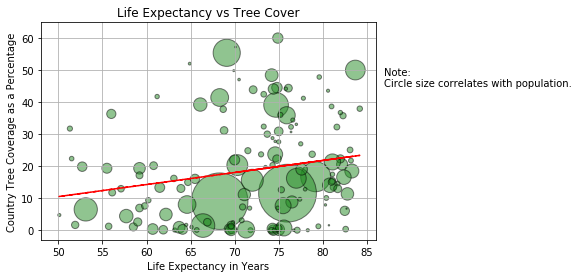

In [7]:
# Do people in countries with more tree cover live longer?

trees = combineddf1["tree_canopy_cover"]
longevity = combineddf1["Life expectancy"]
population = combineddf1["Total Population (millions) 2015"]

plt.scatter(longevity, trees, marker="o", facecolors="forestgreen", edgecolors="black", s=(population**0.9)*5, alpha=0.5)

plt.grid()
plt.title("Life Expectancy vs Tree Cover")
plt.xlabel("Life Expectancy in Years")
plt.ylabel("Country Tree Coverage as a Percentage")
plt.ylim(-3, 65)
plt.xlim(48,86)
plt.text(87,45,"Note:\nCircle size correlates with population.")



z = np.polyfit(longevity, trees, 1)
p = np.poly1d(z)
plt.plot(longevity,p(longevity),"r--")

plt.savefig("Life Expectancy Compared to Tree Cover.png")

plt.show()



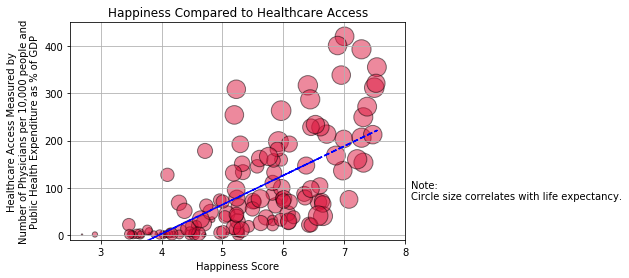

In [8]:
# Are healthier people happier?

phys = combineddf1["Physicians  (per 10,000 people) 2001-2014"]
phe = combineddf1["Public health expenditure (% of GDP) 2014"]
phys_phe = (phys*phe)
combineddf1["pphe"] = phys_phe
healthdf = combineddf1[["Happiness.Score","Life expectancy", "pphe", "Total Population (millions) 2015", "elevation"]]
healthdf2 = healthdf.dropna(axis=0, how="any")
health = healthdf2["pphe"]
happy2 = healthdf2["Happiness.Score"]
longevity2 = healthdf2["Life expectancy"]
population2 = healthdf2["Total Population (millions) 2015"]


plt.scatter(happy2, health, marker="o", facecolors="crimson", edgecolors="black", s=(longevity2-50)**1.7, alpha=0.5)

plt.grid()
plt.title("Happiness Compared to Healthcare Access")
plt.xlabel("Happiness Score")
plt.ylabel("Healthcare Access Measured by\nNumber of Physicians per 10,000 people and\nPublic Health Expenditure as % of GDP")
plt.ylim(-10, 450)
plt.xlim(2.5,8)
plt.text(8.1,75,"Note:\nCircle size correlates with life expectancy.")



z = np.polyfit(happy2, health, 1)
p = np.poly1d(z)
plt.plot(happy2,p(happy2),"b--")

plt.savefig("Happiness Compared to Access to Healthcare.png")
plt.show()



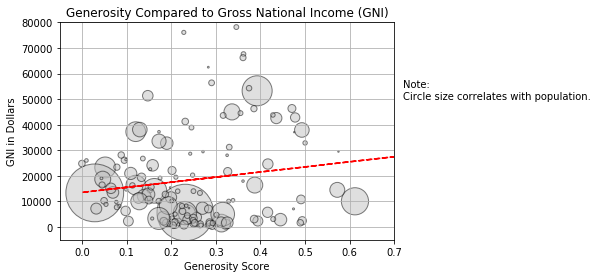

In [9]:
# Are people in countries with an above average GPD more generous

gni = combineddf1["Gross national income (GNI) per capita"]
generosity = combineddf1["Generosity"]
population = combineddf1["Total Population (millions) 2015"]

plt.scatter(generosity, gni, marker="o", facecolors="silver", edgecolors="black", s=(population**0.9)*5, alpha=0.5)

plt.grid()
plt.title("Generosity Compared to Gross National Income (GNI)")
plt.xlabel("Generosity Score")
plt.ylabel("GNI in Dollars")
plt.ylim(-5000, 80000)
plt.xlim(-0.05,0.7)
plt.text(0.72,50000,"Note:\nCircle size correlates with population.")


z = np.polyfit(generosity, gni, 1)
p = np.poly1d(z)
plt.plot(generosity,p(generosity),"r--")

plt.savefig("Generosity Compared to GNI.png")
plt.show()



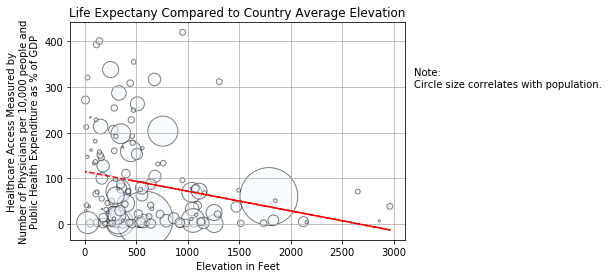

In [10]:
# Are people in highly elevated countries healthier on average?

healthdf2 = healthdf.dropna(axis=0, how="any")
health = healthdf2["pphe"]
population2 = healthdf2["Total Population (millions) 2015"]
elevation = healthdf2["elevation"]

plt.scatter(elevation, health, marker="o", facecolors="aliceblue", edgecolors="black", s=(population2**0.9)*5, alpha=0.5)

plt.grid()
plt.title("Life Expectany Compared to Country Average Elevation")
plt.xlabel("Elevation in Feet")
plt.ylabel("Healthcare Access Measured by\nNumber of Physicians per 10,000 people and\nPublic Health Expenditure as % of GDP")
# plt.ylim(-200, 3200)
# plt.xlim(49,86)
plt.text(3200,300,"Note:\nCircle size correlates with population.")



z = np.polyfit(elevation, health, 1)
p = np.poly1d(z)
plt.plot(elevation,p(elevation),"r--")

plt.savefig("Elevation Compared to Healthcare Access.png")
plt.show()



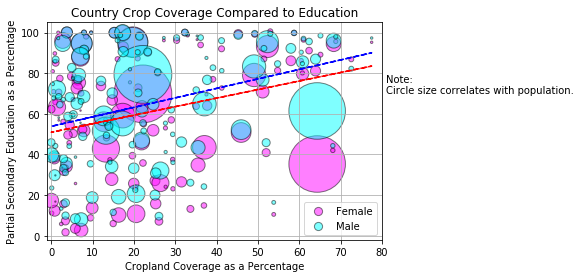

In [11]:
# Is there is relationship between crop cover and education?

cropdf = combineddf1[["cropland_cover","Population with at least some secondary education % (2005-2015) Female",
                      "Population with at least some secondary education % (2005-2015) Male","Total Population (millions) 2015"]]
cropdf = cropdf.dropna(axis=0, how="any")
crop2 = cropdf["cropland_cover"]
female_education = cropdf["Population with at least some secondary education % (2005-2015) Female"]
male_education = cropdf["Population with at least some secondary education % (2005-2015) Male"]
population3 = cropdf["Total Population (millions) 2015"]

plt.scatter(crop2, female_education, marker="o", facecolors="fuchsia", edgecolors="black", s=(population**0.9)*5, alpha=0.5, label="Female")
plt.scatter(crop2, male_education, marker="o", facecolors="cyan", edgecolors="black", s=(population**0.9)*5, alpha=0.5, label = "Male")

plt.grid()
plt.title("Country Crop Coverage Compared to Education")
plt.xlabel("Cropland Coverage as a Percentage")
plt.ylabel("Partial Secondary Education as a Percentage")
plt.ylim(-2, 105)
plt.xlim(-1,80)
plt.text(81,70,"Note:\nCircle size correlates with population.")



plt.legend(markerscale = 0.2)

z = np.polyfit(crop2, female_education, 1)
p = np.poly1d(z)
plt.plot(crop2,p(crop2),"r--")

z = np.polyfit(crop2, male_education, 1)
p = np.poly1d(z)
plt.plot(crop2,p(crop2),"b--")

plt.savefig("Country Crop Coverage Compared to Education.png")
plt.show()


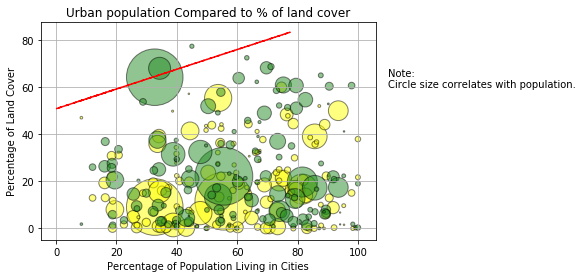

In [12]:

crop = combineddf1["cropland_cover"]
trees = combineddf1["tree_canopy_cover"]
urban = combineddf1["Population Urban 2015 %"]
population = combineddf1["Total Population (millions) 2015"]

plt.scatter(urban, trees, marker="o", facecolors="yellow", edgecolors="black", s=(population**0.9)*5, alpha=0.5)
plt.scatter(urban, crop, marker="o", facecolors="forestgreen", edgecolors="black", s=(population**0.9)*5, alpha=0.5)

# Incorporate the other graph properties
plt.grid()
plt.title("Urban population Compared to % of land cover")
plt.xlabel("Percentage of Population Living in Cities")
plt.ylabel("Percentage of Land Cover")
# plt.ylim(-200, 3200)
# plt.xlim(49,86)
plt.text(110,60,"Note:\nCircle size correlates with population.")


z = np.polyfit(crop2, female_education, 1)
p = np.poly1d(z)
plt.plot(crop2,p(crop2),"r--")
plt.savefig("Urban population Compared land cover.png")
plt.show()

In [13]:
#Find the list of columns that have atleast one row with nan
combineddf1.columns[combineddf1.isnull().any()]

Index(['elevation', 'aspect', 'slope', 'wind', 'cloudiness', 'HDI Rank', 'HDI',
       'Mean years of schooling', 'GNI per capita rank minus HDI rank',
       'Change in HDI rank 2010-2015', 'Average annual HDI growth 1990-2000',
       'Average annual HDI growth 2000-2010',
       'Average annual HDI growth 2010-2015',
       'Average annual HDI growth 1990-2015', 'Gender Development Index value',
       'Gender Development Index Group',
       'Human Development Index (HDI) Female',
       'Human Development Index (HDI) Male', 'Mean years of schooling Female',
       'Mean years of schooling Male',
       'Estimated gross national income per capita Female',
       'Estimated gross national income per capita Male',
       'Share of seats in parliament (% held by women)',
       'Population with at least some secondary education % (2005-2015) Female',
       'Population with at least some secondary education % (2005-2015) Male',
       'Population Ages 15–64 (millions) 2015',
       'I

In [14]:
# Find the list of columns that have only one value that is nan
nullcolumns = combineddf1.isnull().sum(axis=0)
nullcolumns
nullcolumns[nullcolumns==1]

elevation                                                    1
aspect                                                       1
slope                                                        1
HDI Rank                                                     1
HDI                                                          1
Mean years of schooling                                      1
GNI per capita rank minus HDI rank                           1
Change in HDI rank 2010-2015                                 1
Average annual HDI growth 2010-2015                          1
Estimated gross national income per capita Female            1
Estimated gross national income per capita Male              1
Share of seats in parliament (% held by women)               1
Population Ages 15–64 (millions) 2015                        1
Infants lacking immunization DTP (% of one-year-olds)        1
Infants lacking immunization Measles (% of one-year-olds)    1
Mortality rates Infant (per 1,000 live births) 2015    

In [15]:
#For one of the above columns replace nan with the bin average
combineddf1['Share of seats in parliament (% held by women)'] = combineddf1[['Share of seats in parliament (% held by women)']].fillna(combineddf1.groupby('binnedpercapita').transform('mean'))
#combineddf1[['Share of seats in parliament (% held by women)']].fillna(2)
nullcolumns1 = combineddf1.isnull().sum(axis=0)
nullcolumns1
nullcolumns1[nullcolumns1==1]
#[x for x in combineddf1['Share of seats in parliament (% held by women)']]

elevation                                                    1
aspect                                                       1
slope                                                        1
HDI Rank                                                     1
HDI                                                          1
Mean years of schooling                                      1
GNI per capita rank minus HDI rank                           1
Change in HDI rank 2010-2015                                 1
Average annual HDI growth 2010-2015                          1
Estimated gross national income per capita Female            1
Estimated gross national income per capita Male              1
Population Ages 15–64 (millions) 2015                        1
Infants lacking immunization DTP (% of one-year-olds)        1
Infants lacking immunization Measles (% of one-year-olds)    1
Mortality rates Infant (per 1,000 live births) 2015          1
Mortality rates Under-five (per 1,000 live births) 2015

In [16]:
# Creating a dataframe with only columns that are all non-nulls
combineddf2 = combineddf1.dropna( axis=1, how='any', thresh=None, subset=None)
#combineddf2.to_excel('nonulls.xls')

#Check correlation  of Happiness with one column, say Internet users
combineddf1['Internet users'].corr(combineddf1['Happiness.Score'])


0.8066985073861793

In [17]:
#Creating a series that checks correltion between Happiness score and all other columns
correlations = combineddf2[combineddf2.columns[:]].corr()['Happiness.Score'][:]
type(correlations)

pandas.core.series.Series

In [18]:
#Sorting my columms that have most correlations with Happiness score
correlations.sort_values(ascending=False)
#correlations.to_excel('corr.xls')

Happiness.Score                                                         1.000000
Whisker.low                                                             0.999501
Whisker.high                                                            0.999477
Economy..GDP.per.Capita.                                                0.810689
Internet users                                                          0.806699
Inequality-adjusted life expectancy index                               0.787390
Health..Life.Expectancy.                                                0.783550
Life expectancy                                                         0.781633
Life expectancy at birth Male                                           0.780866
Life expectancy at age 59 (years) 2010/2015                             0.770341
Life expectancy at birth Female                                         0.767016
Family                                                                  0.756369
Population Urban 2015 %     

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
#Creating a dataframe with a few columns that have good correlation with Happiness Index. Including population as well
X = combineddf2[['Total Population (millions) 2015', 'Whisker.low',
'Economy..GDP.per.Capita.',
'Internet users',
'Inequality-adjusted life expectancy index',
'Health..Life.Expectancy.',
'Family',
'Freedom',
'Dependency Ratio Old age (65 and older) /(per 100 people ages 15–64)',
'Dystopia.Residual',
'Trust..Government.Corruption.',
'cropland_cover',
'Generosity',
'temp_max_warmestMonth',
'rain_seasonailty',
'temp_diurnal_range',
'Deaths due to Tuberculosis (per 100,000 people) ',
'Total fertility rate (birth per woman) 2000/2007',
'Dependency Ration Young age (0–14) /(per 100 people ages 15–64)',
'Inequality in life expectancy (%) 2010-2015'
]]

#X = combineddf2.drop('Happiness.Score', axis = 1)

X = X.reset_index()

X.drop('Country', axis = 1, inplace=True)
X.columns
#X.fillna(random.random(), inplace=True)


Index(['Total Population (millions) 2015', 'Whisker.low',
       'Economy..GDP.per.Capita.', 'Internet users',
       'Inequality-adjusted life expectancy index', 'Health..Life.Expectancy.',
       'Family', 'Freedom',
       'Dependency Ratio Old age (65 and older) /(per 100 people ages 15–64)',
       'Dystopia.Residual', 'Trust..Government.Corruption.', 'cropland_cover',
       'Generosity', 'temp_max_warmestMonth', 'rain_seasonailty',
       'temp_diurnal_range',
       'Deaths due to Tuberculosis (per 100,000 people) ',
       'Total fertility rate (birth per woman) 2000/2007',
       'Dependency Ration Young age (0–14) /(per 100 people ages 15–64)',
       'Inequality in life expectancy (%) 2010-2015'],
      dtype='object')

In [21]:
#Creating a Dataframe with happiness score alone
y = combineddf2['Happiness.Score']
#y.append([276,.9])
len(y)

y = y.reset_index()
y.drop('Country', axis = 1, inplace=True)
#X.to_excel('X.xls')
#y.to_excel('y.xls')
#y

In [22]:
#Creating a Linear Regression Model
model = LinearRegression()

In [23]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
#Providing the values to the model
model.fit(X,y)
model.coef_
#y.shape, X.shape

array([[ 1.38537898e-07, -1.68763970e-03,  1.00170891e+00,
         5.11554394e-06, -2.25994474e-03,  1.00290403e+00,
         1.00154603e+00,  1.00165935e+00, -6.67157398e-06,
         1.00162970e+00,  1.00135205e+00,  2.36322969e-06,
         1.00203051e+00, -9.68252898e-06, -5.67792314e-07,
         2.03640965e-05, -7.34149554e-07,  9.04595594e-06,
         3.11988035e-06, -1.32686033e-05]])

In [25]:
# Creating a dataframe with countries and variables for which Happiness Index is to be predicted
testset = pd.read_csv('Pred_Input.csv')
#X_test
testset.shape

(4, 20)

In [26]:
# Creating a happiess prediciton column and adding to the dataframe
predictions = model.predict(testset)
predictions

array([[8.73855695],
       [5.92667329],
       [7.16829791],
       [9.94706629]])

In [27]:
testset['happiness_pred'] = predictions
testset

,Total Population (millions) 2015,Whisker.low,Economy..GDP.per.Capita.,Internet users,Inequality-adjusted life expectancy index,Health..Life.Expectancy.,Family,Freedom,Dependency Ratio Old age (65 and older) /(per 100 people ages 15–64),Dystopia.Residual,...,cropland_cover,Generosity,temp_max_warmestMonth,rain_seasonailty,temp_diurnal_range,"Deaths due to Tuberculosis (per 100,000 people)",Total fertility rate (birth per woman) 2000/2007,Dependency Ration Young age (0–14) /(per 100 people ages 15–64),Inequality in life expectancy (%) 2010-2015,happiness_pred
0,120,5,1.0,80,1,1.0,1.160837,0.472788,13.0,4.000000,...,22.183475,0.600000,25.190887,89.453030,12.194984,2.8,1.0,23.5,99,8.738557
1,1200,4,1.0,80,1,1.0,0.754373,0.469987,8.6,2.000000,...,64.343773,0.500000,37.033478,114.953457,11.833430,17.0,1.0,43.9,99,5.926673
2,350,4,2.0,80,1,1.0,2.000000,1.000000,6.0,1.111292,...,0.877801,0.020000,24.107237,105.142175,13.795700,2.2,1.0,41.7,99,7.168298
3,25,7,1.5,100,1,1.5,2.200000,2.000000,22.7,2.065211,...,7.938567,0.477699,35.186079,59.336975,13.980067,0.2,0.5,28.2,99,9.947066
